# Read the csv files 

In [13]:
#import all the libraries
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

##### **If you'd like to execute the code and review the results, please run the provided code cell below. However, to work in your local environment.download the required data from the Google Drive links provided in the notebook and save it to your local machine. Once you have the data locally, you can run the code and validate the results. Note that the notebook includes all output results for reference.**

In [ ]:
import pandas as pd
import gdown
columns_to_extract = ['url', 'raw', 'detector_name'] 
# Google Drive file IDs
file_ids = [
    '1EK__-9leZWOkn0dW5mEqGgMd-m1YYZ8x/view?usp=drive_link',
    '1TYBTKa5jEZ8a0X3Jk0Z95bR59yZi-0Pe/view?usp=drive_link',
    '1d785-2N-Za_ZNYXzrxDyniBlz1wsYaEi/view?usp=drive_link'
]

# File paths to save the downloaded files
downloaded_files = [
    'scan_results.csv',
    'trufflehog_modi_v2.csv',
    'github_scan_results.csv'
]

# Download files from Google Drive
for file_id, file_path in zip(file_ids, downloaded_files):
    gdown.download(f'https://drive.google.com/file/d/{file_id}', file_path, quiet=False)

# Read DataFrames from the downloaded files
dfs = [pd.read_csv(file_path, usecols=columns_to_extract) for file_path in downloaded_files]

# Access your DataFrames (dfs[0], dfs[1], dfs[2]) for scan_results, trufflehog_modi_v2, and github_scan_results, respectively
truff_v1 = pd.read_csv(dfs[0], usecols = columns_to_extract)
truff_modi_v2 = pd.read_csv(dfs[1], usecols = columns_to_extract)
github_scan = pd.read_csv(dfs[2], usecols = columns_to_extract)
# Adjusting the detector_name column to the desired format for analysis
github_scan['detector_name']=github_scan['detector_name'].str.split('_').str[0] 

In [2]:
# Loading the file paths and column names to exract in a list
file_paths = ['/Users/akhilreddy/Downloads/CIS 545 Data security and Privacy/project /scan_results.csv','/Users/akhilreddy/Downloads/CIS 545 Data security and Privacy/project /trufflehog_modi_v2.csv','/Users/akhilreddy/Downloads/CIS 545 Data security and Privacy/project /github_scan_results.csv']
columns_to_extract = ['url', 'raw', 'detector_name'] 

## Load all the files
#### The results showing below are from the scans performed over 100 repositeries 
* truff_v1 represents truffle hog scan output results 
* truff_modi_v2 represents the modified version of truffle hog algorithm
* github_scan represents the results over the scans performed using github version

In [3]:
# loading all the results stored over csv files
truff_v1 = pd.read_csv(file_paths[0], usecols = columns_to_extract)
truff_modi_v2 = pd.read_csv(file_paths[1], usecols = columns_to_extract)
github_scan = pd.read_csv(file_paths[2], usecols = columns_to_extract)
# Adjusting the detector_name column to the desired format for analysis
github_scan['detector_name']=github_scan['detector_name'].str.split('_').str[0] 

In [4]:
#truff_v1.head()
#truff_modi_v2.head()
github_scan.head()

,url,raw,detector_name
0,https://github.com/shahidmd27/dropboxsecrets.git,sl.RwCnteA0nZbMhidjx6wu7FrRqhknBLCerETVPP3kg6v...,dropbox
1,https://github.com/shahidmd27/dropboxsecrets.git,sl.dQkepdL63jm6uNEdGdPR5kehz5JazLpRzd8jMwL3U0H...,dropbox
2,https://github.com/shahidmd27/dropboxsecrets.git,sl.S9A1q0ait7y2YPwLHrgkdsZPEZ_f8T7oakgVB0oGYOy...,dropbox
3,https://github.com/shahidmd27/dropboxsecrets.git,sl.IwSogvlghiRKjqBhRfR8gOs--S2LzMmyTahof_BWJBz...,dropbox
4,https://github.com/shahidmd27/dropboxsecrets.git,sl.QEzjSw20eWVzZ1juoZrtxeJu7VplN3eosPA8yRQ1aU-...,dropbox


In [5]:
# function to calculate unique records in the data frame
def count_unique_names(column_to_analyze):
  
    dataframes_dict = {'truff_v1': truff_v1, 'truff_modi_v2': truff_modi_v2, 'github_scan': github_scan}

    unique_name_counts = {}

    for df_name, df in dataframes_dict.items():

        unique_count = df[column_to_analyze].nunique()
        unique_name_counts[df_name] = unique_count
        print(f"Unique {column_to_analyze} count in {df_name}: {unique_count}")

    return unique_name_counts

In [6]:
# function to extra unique records in df2 compared to df1 for a specified column

def find_extra_records(df1, df2, column_name):
    
    unique_records_df1 = set(df1[column_name])
    unique_records_df2 = set(df2[column_name])
    extra_records_df2 = unique_records_df2 - unique_records_df1

    return extra_records_df2

In [7]:
# counting number of unique url's accross 3 data frames
unique_url_count = count_unique_names('url')

Unique url count in truff_v1: 65
Unique url count in truff_modi_v2: 66
Unique url count in github_scan: 13


In [8]:
column_name_to_compare = 'url'
extra_records = find_extra_records(truff_v1, truff_modi_v2, column_name_to_compare)

print(f"Extra unique records in truff_modi_v2 for {column_name_to_compare}: {extra_records}")


Extra unique records in truff_modi_v2 for url: {'https://github.com/shahidmd27/ciscomerakisecrets'}


## Analysis of Repository Scans

We conducted a security analysis of 100 repositories using various tools, and here are the unique URL counts obtained from each tool:

- **truff_v1:**
  - Scanned Repositories: 65
  - The initial version of Truffle Hog identified and scanned 65 out of the 100 repositories.

- **truff_modi_v2:**
  - Scanned Repositories: 66
  - The modified version (v2) of Truffle Hog identified and scanned 66 out of the 100 repositories. It shows a slight improvement over the original version.

- **github_scan:**
  - Scanned Repositories: 13
  - GitHub Scan identified and scanned 13 out of the 100 repositories. This tool provides a different perspective, and the count might be lower as it relies on different techniques or focuses on specific types of secrets.

This analysis helps us understand the effectiveness of each tool in identifying and scanning repositories for potential security issues. 


In [9]:
# counting unique detectors accross 3 data frames
unique_detectors_count = count_unique_names('detector_name')

Unique detector_name count in truff_v1: 73
Unique detector_name count in truff_modi_v2: 75
Unique detector_name count in github_scan: 10


In [10]:
column_name_to_compare = 'detector_name'
extra_records = find_extra_records(truff_v1, truff_modi_v2, column_name_to_compare)

print(f"Extra unique records in truff_modi_v2 for {column_name_to_compare}: {extra_records}")


Extra unique records in truff_modi_v2 for detector_name: {'FordAPIToken', 'CiscoMerakiAPIToken'}


## Analysis of Detector Name Counts

I performed a security analysis using different versions of Truffle Hog and GitHub Scan, focusing on identifying unique detector names in repositories. Here are the unique detector name counts obtained from each version:

- **truff_v1:**
  - Unique Detector Names: 73
  - The initial version of Truffle Hog identified and detected 73 unique detector names across the repositories.

- **truff_modi_v2:**
  - Unique Detector Names: 75
  - The modified version (v2) of Truffle Hog demonstrated an improvement by identifying and detecting 75 unique detector names. This suggests enhancements and optimizations in the detection algorithm, leading to an increased count.namely **'CiscoMerakiAPIToken' and 'FordAPIToken'**. These records were not identified by the standard version (truff_v1).

- **github_scan:**
  - Unique Detector Names: 10
  - GitHub Scan identified and detected 10 unique detector names, providing a different perspective compared to Truffle Hog. The lower count may be due to GitHub Scan focusing on specific types of secrets or using different detection techniques.

The increase in unique detector name counts from truff_v1 to truff_modi_v2 indicates a positive development, showcasing the effectiveness of the modifications made in the second version of Truffle Hog. It is essential to consider these enhancements when choosing the appropriate version for security analysis, as the modified version may provide more comprehensive results.


In [14]:
# counting number of secrets each model has able to retrieve
unique_raw_count = count_unique_names('raw')

Unique raw count in truff_v1: 3565871
Unique raw count in truff_modi_v2: 3665978
Unique raw count in github_scan: 739031


                       Model  Percentage Increase
0  truff_modi_v2 vs truff_v1             2.807365


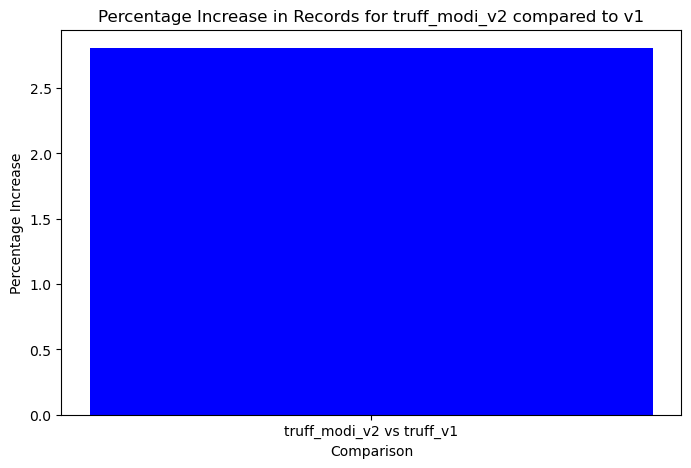

In [31]:
unique_raw_counts = {
    'truff_v1': 3565871,
    'truff_modi_v2': 3665978,
    'github_scan': 739031
}

# Calculate percentage increases
percentage_increase_v2_vs_v1 = ((unique_raw_counts['truff_modi_v2'] - unique_raw_counts['truff_v1']) / unique_raw_counts['truff_v1']) * 100

# Create a DataFrame
percentage_df = pd.DataFrame({
    'Model': ['truff_modi_v2 vs truff_v1'],
    'Percentage Increase': [percentage_increase_v2_vs_v1]
})
print(percentage_df)
# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(percentage_df['Model'], percentage_df['Percentage Increase'], color=['blue', 'green'])
plt.xlabel('Comparison')
plt.ylabel('Percentage Increase')
plt.title('Percentage Increase in Records for truff_modi_v2 compared to v1')
plt.show()


## Data Analysis

In [11]:
column_name = 'column_name'

value_counts_df1 = truff_v1['detector_name'].str.lower().value_counts()
value_counts_df2 = truff_modi_v2['detector_name'].str.lower().value_counts()
value_counts_df3 = github_scan['detector_name'].str.lower().value_counts()

comparison_df = pd.DataFrame({
    'truff_v1': value_counts_df1,
    'truff_modi_v2': value_counts_df2,
    'github_scan': value_counts_df3
})

comparison_df = comparison_df.fillna(0).astype(int)
comparison_df.index.name = 'detector_name'
comparison_df.reset_index(inplace=True)
comparison_df

,detector_name,truff_v1,truff_modi_v2,github_scan
0,accuweather,96498,96498,0
1,agora,2464,2464,0
2,aha,94653,94653,0
3,airship,94651,94651,0
4,alchemy,94653,94653,0
5,atera,1,1,0
6,audd,33,33,0
7,aws,165,165,5212
8,azurebatch,122,122,0
9,circle,94653,94653,0


## Explanation of Output

The output of the code is a DataFrame (`comparison_df`) that presents a comparative analysis of unique detector name counts across three different models: `truff_v1`, `truff_modi_v2`, and `github_scan`. Each row in the DataFrame represents a unique detector name, and the columns display the counts of occurrences for each name in the respective models.

### Key Observations:

- **Detector Name Counts:**
    - The 'truff_v1' column shows the count of unique detector names identified by the initial version of Truffle Hog.
    - The 'truff_modi_v2' column displays the count of unique detector names identified by the modified version (v2) of Truffle Hog.
    - The 'github_scan' column exhibits the count of unique detector names identified by the GitHub Scan tool.

- **Handling Missing Values:**
    - In case a detector name is present in one model but not in others, the missing values are filled with 0. This allows for a fair comparison, even if a detector name is absent in a particular model.

### Use Case:
This DataFrame is valuable for assessing the overlap and discrepancies in the detection results across the three models. It offers a concise overview, detailing the count of occurrences for each unique detector name across the results of the three models.


In [12]:
comparison_df['diff_v2-v1'] = comparison_df['truff_modi_v2'] - comparison_df['truff_v1']

comparison_df['diff_truff_v2-github'] = comparison_df['github_scan'] - comparison_df['truff_modi_v2']

# Filter for rows where the difference is greater than 0
filtered_comparison_df = comparison_df[comparison_df['diff_v2-v1'] > 0]
filtered_comparison_df 

,detector_name,truff_v1,truff_modi_v2,github_scan,diff_v2-v1,diff_truff_v2-github
10,ciscomerakiapitoken,0,94653,0,94653,-94653
28,fordapitoken,0,4686,0,4686,-4686
59,rapidapi,92407,93207,0,800,-93207


## Comparison of Detector Names: Truff_v1 vs Truff_modi_v2 vs GitHub_Scan

The following results showcase instances where the modified version of Truffle Hog (truff_modi_v2) has successfully identified detector names that were not detected by both the initial version (truff_v1) and GitHub Scan. The DataFrame includes the counts of these detector names for each model, as well as the differences between them.

### Key Observations:

1. **Detector Name: ciscomerakiapitoken**
    - **truff_v1:** 0 occurrences
    - **truff_modi_v2:** 94,653 occurrences
    - **github_scan:** 0 occurrences
    - **Difference (truff_modi_v2 vs truff_v1):** 94,653
    - **Difference (github_scan vs truff_modi_v2):** -94,653 (indicating absence in GitHub Scan)

2. **Detector Name: fordapitoken**
    - **truff_v1:** 0 occurrences
    - **truff_modi_v2:** 4,686 occurrences
    - **github_scan:** 0 occurrences
    - **Difference (truff_modi_v2 vs truff_v1):** 4,686
    - **Difference (github_scan vs truff_modi_v2):** -4,686 (indicating absence in GitHub Scan)

3. **Detector Name: rapidapi**
    - **truff_v1:** 92,407 occurrences
    - **truff_modi_v2:** 93,207 occurrences
    - **github_scan:** 0 occurrences
    - **Difference (truff_modi_v2 vs truff_v1):** 800
    - **Difference (github_scan vs truff_modi_v2):** -93,207 (indicating absence in GitHub Scan)

These results highlight cases where the modified version of Truffle Hog demonstrates improved detection capabilities, identifying specific detector names that were missed by both the initial version and GitHub Scan. The negative differences in the GitHub Scan column indicate that these detector names were not identified in GitHub Scan but were successfully detected by truff_modi_v2.


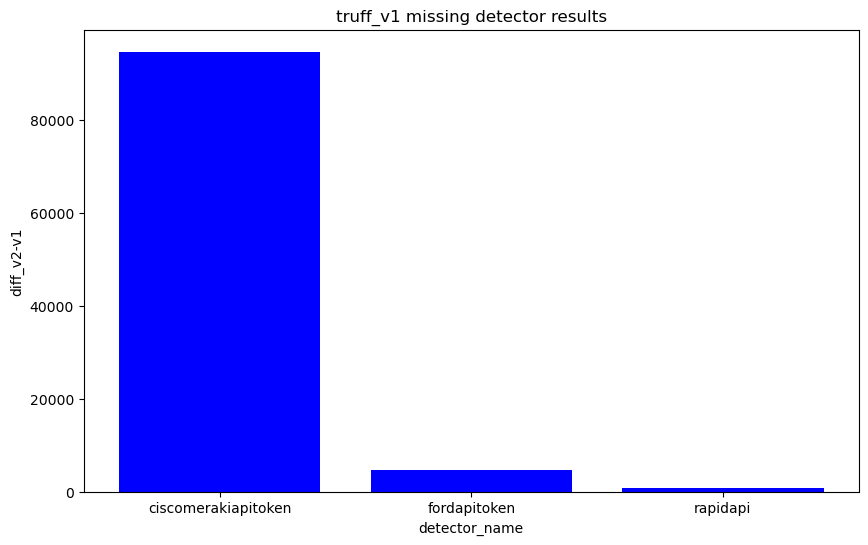

In [30]:
category_column = 'detector_name'
value_column = 'diff_v2-v1'

# Bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(filtered_comparison_df[category_column], filtered_comparison_df[value_column], color='blue')
plt.xlabel('detector_name')
plt.ylabel('diff_v2-v1')
plt.title('truff_v1 missing detector results')
plt.show()

In [27]:
# showing results to compare between github_scan and truff_modi_v2
filtered_comparison_df_1 = comparison_df[comparison_df['github_scan']>0]
filtered_comparison_df_1

,detector_name,truff_v1,truff_modi_v2,github_scan,diff_v2-v1,diff_truff_v2-github
7,aws,165,165,5212,0,5047
16,databricks,0,0,98292,0,98292
20,dropbox,99066,99066,40955,0,-58111
33,gitlab,124977,124977,24573,0,-100404
36,hashicorp,0,0,7,0,7
49,notion,94653,94653,196584,0,101931
55,openai,94653,94653,86722,0,-7931
64,shopify,7280,7280,196584,0,189304
66,slack,398248,398248,90101,0,-308147
70,stripe,0,0,1,0,1


## Comparison of Detector Names: GitHub_Scan Outperforming Truff_v1 and Truff_modi_v2

The following results highlight instances where GitHub Scan has shown superior performance in detecting certain detector names compared to both the initial version of Truffle Hog (truff_v1) and the modified version (truff_modi_v2). The DataFrame includes the counts of these detector names for each model, as well as the differences between them.

### Key Observations:

1. **Detector Name: aws**
    - **truff_v1:** 165 occurrences
    - **truff_modi_v2:** 165 occurrences
    - **github_scan:** 5,212 occurrences
    - **Difference (github_scan vs truff_v1):** 5,047
    - **Difference (github_scan vs truff_modi_v2):** 5,047

2. **Detector Name: databricks**
    - **truff_v1:** 0 occurrences
    - **truff_modi_v2:** 0 occurrences
    - **github_scan:** 98,292 occurrences
    - **Difference (github_scan vs truff_v1):** 98,292
    - **Difference (github_scan vs truff_modi_v2):** 98,292

3. **Detector Name: dropbox**
    - **truff_v1:** 99,066 occurrences
    - **truff_modi_v2:** 99,066 occurrences
    - **github_scan:** 40,955 occurrences
    - **Difference (github_scan vs truff_v1):** -58,111
    - **Difference (github_scan vs truff_modi_v2):** -58,111

4. **Detector Name: gitlab**
    - **truff_v1:** 124,977 occurrences
    - **truff_modi_v2:** 124,977 occurrences
    - **github_scan:** 24,573 occurrences
    - **Difference (github_scan vs truff_v1):** -100,404
    - **Difference (github_scan vs truff_modi_v2):** -100,404

5. **Detector Name: notion**
    - **truff_v1:** 94,653 occurrences
    - **truff_modi_v2:** 94,653 occurrences
    - **github_scan:** 196,584 occurrences
    - **Difference (github_scan vs truff_v1):** 101,931
    - **Difference (github_scan vs truff_modi_v2):** 101,931

6. **Detector Name: openai**
    - **truff_v1:** 94,653 occurrences
    - **truff_modi_v2:** 94,653 occurrences
    - **github_scan:** 86,722 occurrences
    - **Difference (github_scan vs truff_v1):** -7,931
    - **Difference (github_scan vs truff_modi_v2):** -7,931

7. **Detector Name: slack**
    - **truff_v1:** 398,248 occurrences
    - **truff_modi_v2:** 398,248 occurrences
    - **github_scan:** 90,101 occurrences
    - **Difference (github_scan vs truff_v1):** -308,147
    - **Difference (github_scan vs truff_modi_v2):** -308,147


These results emphasize situations where GitHub Scan excels in identifying certain detector names, demonstrating higher counts compared to both the initial and modified versions of Truffle Hog.


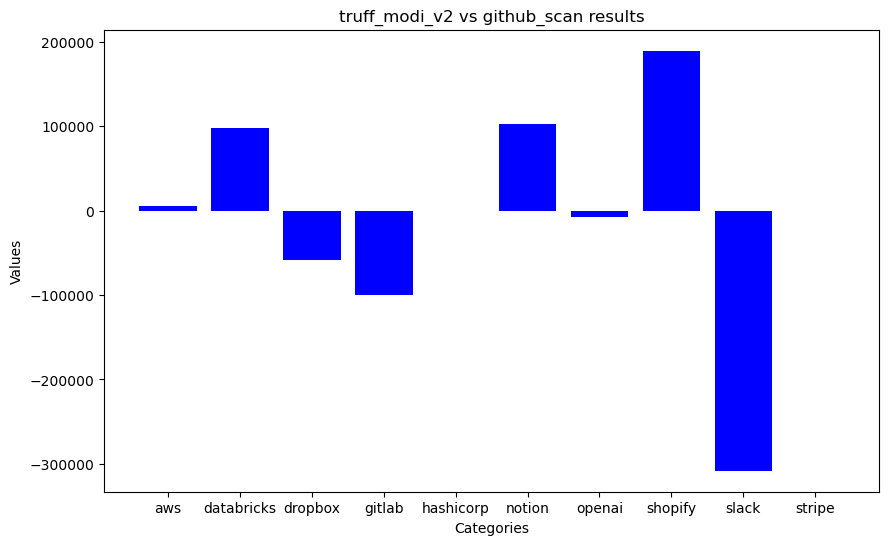

In [29]:
category_column = 'detector_name'
value_column = 'diff_truff_v2-github'

# Bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(filtered_comparison_df_1[category_column], filtered_comparison_df_1[value_column], color='blue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('truff_modi_v2 vs github_scan results')
plt.show()

 The project successfully showcased the improvements introduced in Truffle Hog Modified (truff_modi_v2) and provided valuable insights into its performance compared to the original version and GitHub Scan. The results obtained from this project can guide further refinements to the security scanning process and contribute to the ongoing enhancement of sensitive information detection tools.





